# Quantinuum Hardware Quantum Volume Test Data 

This notebook contains an overview of loading and viewing Quantum Volume Test (QVT) data for Quantinuum H-Series hardware.

## Loading QVT Data
Each QV data file is saved as a dictionary in a json file with five keys:
- `qv_circs_nomeas`: list of qasm for each qv circuit without optimization and no final measurement
- `qv_circs`: list of qasm for each qv circuit in same order as `qv_circs_nomeas`
- `raw_results`: list of outputs from each shot of each qv circuit in same order as `qv_circs_nomeas`
- `heavy_outputs`: frequency of observed heavy output counts for each circuit in same order as `qv_circs_nomeas` 
- `heavy_ideal`: probability of heavy output without errors in same order as `qv_circs_nomeas`

For n>20 `qv_circs` is seperated out into a different json file with `'_qv_circs.json'` due to github file size limits.

Available datasets:
- `'n6_H0_raw_results.json'`: QV 64 passed on 06/20/2020*
- `'n7_H1-1_raw_results.json'`: QV 128 passed on 09/29/2020*
- `'n9_H1-1_raw_results.json'`: QV 512 passed on 03/02/2021*
- `'n10_H1-1_raw_results.json'`: QV 1,024 passed on 07/12/2021*
- `'n11_H1-2_raw_results.json'`: QV 2,048 passed on 12/17/2021*
- `'n12_H1-2_raw_results.json'`: QV 4,096 passed on 04/11/2022&dagger;
- `'n13_H1-1_raw_results.json'`: QV 8,192 passed on 09/20/2022&dagger;
- `'n14_H1-1_raw_results.json'`: QV 16,384 passed on 01/11/2023&dagger;
- `'n15_H1-1_raw_results.json'`: QV 32,768 passed on 01/18/2023&dagger;
- `'n15_H2-1_raw_results.json'`: QV 32,768 passed on 04/10/2023&dagger;
- `'n16_H1-1_raw_results.json'`: QV 65,536 passed on 03/17/2023&dagger;
- `'n16_H2-1_raw_results.json'`: QV 65,536 passed on 04/18/2023&dagger;
- `'n17_H1-1_raw_results.json'`: QV 131,072 passed on 05/10/2023&dagger;
- `'n18_H1-1_raw_results.json'`: QV 262,144 passed on 05/25/2023&dagger;
- `'n19_H1-1_raw_results.json'`: QV 524,288 passed on 06/13/2023&dagger;
- `'n15_H1-2_raw_results.json'`: QV 32,768 passed on 10/27/2023&Dagger;
- `'n20_H1-1_raw_results.json'`: QV 1,048,576 passed on 04/04/2024&dagger;

*Passed with IBM confidence interval construction from [Cross *et al.*, PRA **100**, 032328 (2019)](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.100.032328) <br>
&dagger;Passed with bootstrap confidence interval from [Baldwin *et al.*, Quantum **6**, 707 (2022)](https://quantum-journal.org/papers/q-2022-05-09-707/?utm_source=antenna)<br>
&Dagger;Planned to use different bootstrap confidence interval construction with similar coverage but passed with construction from [Baldwin *et al.*, Quantum **6**, 707 (2022)](https://quantum-journal.org/papers/q-2022-05-09-707/?utm_source=antenna)

In [1]:
import pathlib
import json

nqubits = 20
machine = 'H1-1'

file_name = f'n{nqubits}_{machine}_raw_results.json'
data_dir = pathlib.Path.cwd().parent.joinpath('data')

with open(data_dir.joinpath(file_name), 'r') as f:
    data = json.load(f)

We can also load each pickle file and directly convert to a Qiskit `QVFitter` object.

In [2]:
from qtm_qv.loading_functions import load_fitter

qv_fitter = load_fitter(machine, nqubits)
print(f'Measured HOP = {qv_fitter.ydata[0][0]}')

Measured HOP = 0.692040404040404


## Count the number of gates

In [3]:
from qtm_qv.utils import gate_counts
import numpy as np

counts_nomeas = gate_counts(data['qv_circs_nomeas'])
counts = gate_counts(data['qv_circs'])

print(f'TQ gates (no optimization) = {np.mean(counts_nomeas["cx"])}')
print(f'TQ gates (w/ optimization) = {np.mean(counts["rzz"])}')  # replace "rzz" with "cx" for n < 13

TQ gates (no optimization) = 600.0
TQ gates (w/ optimization) = 508.118


## Plot Circuit Index vs. Heavy Output Frequency

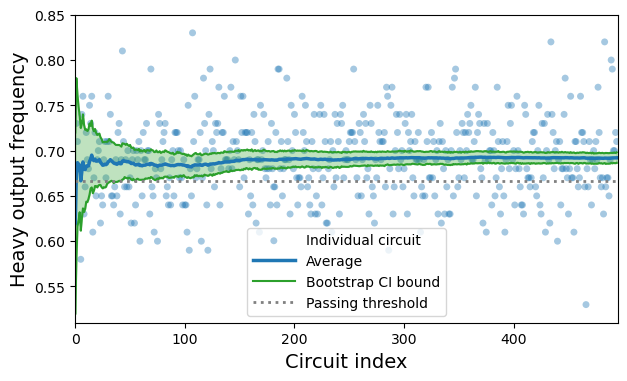

In [4]:
from qtm_qv.plotting_functions import success_v_time

success_v_time(
    qv_fitter, 
    nqubits, 
    original_ci=False,
    bootstrap_ci=True,
    fill_range=True,
)

<div align="center"> &copy; 2024 by Quantinuum. All Rights Reserved. </div>